In [1]:
# 进行反向传播
# Tensorflow的好处就是能够追踪运算，并且利用反向传播自动更新模型
import tensorflow as tf
import numpy as np

sess = tf.Session()

In [27]:
# 准备数据和变量，占位符
x_vals = np.random.normal(1., 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(tf.float32, shape=[1, ])
y_target = tf.placeholder(tf.float32, shape=[1, ])
A = tf.Variable(tf.random_normal(shape=[1]))

In [28]:
model_out = tf.multiply(A, x_data)

In [29]:
# 损失函数L2损失
loss = tf.square(model_out - y_target)

In [30]:
# 优化器
opt = tf.train.GradientDescentOptimizer(learning_rate=0.02).minimize(loss)

In [31]:
init = tf.global_variables_initializer()
sess.run(init)

In [38]:
for i in range(100):
    random_index = np.random.choice(100)
    rand_x = [x_vals[random_index]]
    rand_y = [y_vals[random_index]]
    sess.run(opt, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1) % 25 == 0:
        loss_, A_ = sess.run([loss, A], feed_dict={x_data: rand_x, y_target: rand_y})
        print('Step {0}: A={1}, loss={2}'.format(i+1, A_, loss_))

Step 25: A=[9.635802], loss=[8.762944]
Step 50: A=[9.725661], loss=[0.34017506]
Step 75: A=[9.69019], loss=[0.39676917]
Step 100: A=[9.713978], loss=[3.0477078]


In [39]:
sess.close()

In [2]:
# 分类问题

In [4]:
# 创建数据集
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(3, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))

In [6]:
print(x_vals.shape)
print(x_vals)

(100,)
[-0.81296518 -1.43391973 -1.30043178 -1.79611756  0.64300349  0.51847004
 -2.56972077 -2.53022784 -0.87558221 -1.67185843 -3.31862602  0.17668079
 -0.86117587  1.14577663 -1.79425401 -0.11241588  0.09316317 -1.7471799
 -0.69721887 -0.7141873  -0.72530908 -1.27683148 -2.51084189 -2.45400174
 -0.80070949 -0.78346025  0.01882484 -1.54774315 -0.20846196 -1.47683793
 -1.29653159 -1.16081349 -1.14845248 -2.14118432  1.2220863  -1.68597281
 -3.20220766 -0.43006654 -1.05156612 -1.05830981 -1.2571112  -1.06425733
 -2.50654504 -2.50920104 -0.84721013 -1.7164852  -0.30152477 -1.65206267
 -1.11690936  0.09263359  2.01350045  3.26103972  2.56729187  3.64738847
  2.33915428  3.1075937   3.29635197  2.75913635  2.31252493  2.23859149
  1.54531132  3.25976382  2.84176894  2.59234945  3.39895131  2.84176965
  3.56273182  3.24114744  4.34872837  2.63760363  4.85297677  2.99455656
  3.19221587  2.79138093  2.16074454  3.74210037  3.61359453  4.14246752
  2.94747134  2.0251166   3.53213356  4.06806

In [7]:
print(y_vals.shape)
print(y_vals)

(100,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [8]:
# 创建占位符和变量
x_data = tf.placeholder(tf.float32, shape=[1])
y_data = tf.placeholder(tf.float32, shape=[1])
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [9]:
model_out = tf.add(A, x_data)

In [10]:
print(model_out)

Tensor("Add:0", shape=(1,), dtype=float32)


In [11]:
# 添加一个批次梯度
model_out_expand = tf.expand_dims(model_out, 0)
y_data_expand = tf.expand_dims(y_data, 0)

In [12]:
print(model_out_expand)
print(y_data_expand)

Tensor("ExpandDims:0", shape=(1, 1), dtype=float32)
Tensor("ExpandDims_1:0", shape=(1, 1), dtype=float32)


In [13]:
# 然后初始化所有变量
init = tf.global_variables_initializer()
sess.run(init)

In [14]:
# tf.nn.sigmoid_cross_entropy_with_logits()需要的参数shape要有批次维度，所以需要使用扩充维度后的数据
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=model_out_expand, labels=y_data_expand)

In [15]:
# 优化器
opt = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

In [17]:
# 训练
for i in range(1400):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(opt, feed_dict={x_data: rand_x, y_data: rand_y})
    if (i + 1) % 200 == 0:
        A_, loss_ = sess.run([A, loss], feed_dict={x_data: rand_x, y_data: rand_y})
        print('Step {0}: A={1}, loss={2}'.format(i+1, A_, loss_))

Step 200: A=[2.8413012], loss=[[2.985756]]
Step 400: A=[0.34031016], loss=[[0.06808023]]
Step 600: A=[-0.40381414], loss=[[0.10623284]]
Step 800: A=[-0.8122861], loss=[[0.39670783]]
Step 1000: A=[-1.034798], loss=[[0.01278067]]
Step 1200: A=[-1.114645], loss=[[0.33813828]]
Step 1400: A=[-1.0768024], loss=[[0.07614569]]


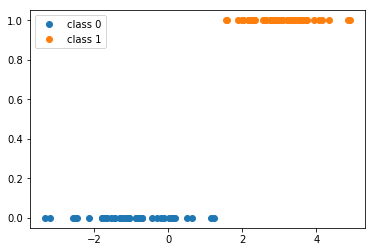

In [19]:
import matplotlib.pyplot as plt

plt.plot(x_vals[:50], y_vals[:50], 'o', label='class 0')
plt.plot(x_vals[50:], y_vals[50:], 'o', label='class 1')
plt.legend()
plt.show()